# Guided Project: Building a Handwritten Digits Classifier

In this Guided Project, we'll:
<li>explore why image classification is a hard task
<li>observe the limitations of traditional machine learning models for image classification
<li>train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first mission in this course, deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks here.

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf.

## 2. Working with Image Data



In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import load_digits() from the sklearn.datasets package.
from sklearn.datasets import load_digits

In [2]:
#Transform the NumPy 2D array into a pandas dataframe.
digits=load_digits()

In [3]:
type(digits)

sklearn.datasets.base.Bunch

In [4]:
digits.keys()

dict_keys(['DESCR', 'images', 'target', 'data', 'target_names'])

In [5]:
data=pd.DataFrame(digits['data'])
labels=pd.Series(digits['target'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [7]:
data.shape

(1797, 64)

In [8]:
labels.shape

(1797,)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
0     1797 non-null float64
1     1797 non-null float64
2     1797 non-null float64
3     1797 non-null float64
4     1797 non-null float64
5     1797 non-null float64
6     1797 non-null float64
7     1797 non-null float64
8     1797 non-null float64
9     1797 non-null float64
10    1797 non-null float64
11    1797 non-null float64
12    1797 non-null float64
13    1797 non-null float64
14    1797 non-null float64
15    1797 non-null float64
16    1797 non-null float64
17    1797 non-null float64
18    1797 non-null float64
19    1797 non-null float64
20    1797 non-null float64
21    1797 non-null float64
22    1797 non-null float64
23    1797 non-null float64
24    1797 non-null float64
25    1797 non-null float64
26    1797 non-null float64
27    1797 non-null float64
28    1797 non-null float64
29    1797 non-null float64
30    1797 non-null float64
31    1797 non-null float

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


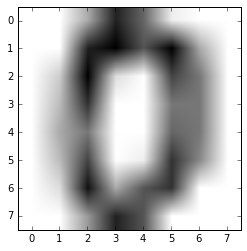

In [10]:
#Display first image, method 1
first_image=data.iloc[0]
np_image=first_image.reshape(8,8)
plt.imshow(np_image,cmap='gray_r')

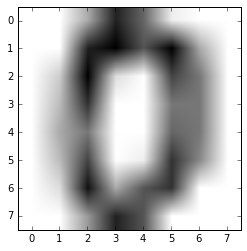

In [11]:
#Display first image, method 2
plt.imshow(data.iloc[0].values.reshape(8,8),cmap='gray_r')

4 4


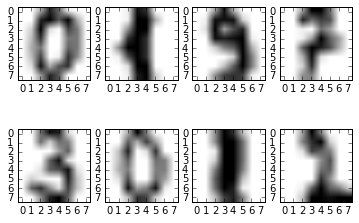

In [12]:
#Display the images corresponding to rows 0, 100, 200,300, 1000, 1100, 1200, and 1300.
image_rows=[1,100,200,300,1000,1100,1200,1300]

#Generate a scatter plot grid, with 2 rows and 4 columns. Method 1
fig,ax=plt.subplots(2,4)
first_counter=0
second_counter=0
for i,j in enumerate(image_rows):
    if i < 4:
        ax[0,first_counter].imshow(data.iloc[j-1].values.reshape(8,8),cmap='gray_r')
        first_counter+=1
    if i>=4:
        ax[1,second_counter].imshow(data.iloc[j-1].values.reshape(8,8),cmap='gray_r')
        second_counter+=1
print(first_counter,second_counter)
plt.show()       

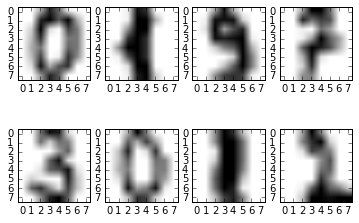

In [13]:
#Generate a scatter plot grid, with 2 rows and 4 columns. Method 2
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## 3. K-Nearest Neighbors Model

In [14]:
#Split up the data into train and test sets.
#shuffled_index=np.random.permutation(data.index)
#shuffled_data=data.loc[shuffled_index]
#shuffled_labels=labels.loc[shuffled_index]

#mid_length=int(data.shape[0]/2)
#train_data=shuffled_data.iloc[:mid_length]
#test_data=shuffled_data.iloc[mid_length:]
#train_labels=shuffled_labels.iloc[:mid_length]
#test_labels=shuffled_labels.iloc[mid_length:]

In [15]:
#Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train(train_features,train_labels,number_of_neighbors):
    neighbor=KNeighborsClassifier(n_neighbors=number_of_neighbors)
    neighbor.fit(train_features,train_labels)
    return neighbor

In [16]:
#Write a function named test() that tests the model.
def test(neighbor,test_features,test_labels):
    accuracy_scores=[]
    predictions=neighbor.predict(test_features)
    accuracy=accuracy_score(test_labels,predictions)
    accuracy_scores.append(accuracy)
    return accuracy_scores

In [17]:
#Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
def cross_validate(data,labels,k):
    kf=KFold(n_splits=4,shuffle=True,random_state=2)
    fold_accuracy=[]
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        trained=train(train_features,train_labels,k)
        tested=test(trained,test_features,test_labels)
        fold_accuracy.append(tested)
    return fold_accuracy

In [18]:
print(data.shape,labels.shape)
k_one_accuracies=cross_validate(data,labels,1)
np.mean(k_one_accuracies)

(1797, 64) (1797,)


0.9888728037614452

In [19]:
#Experiment with different values for k and plot the resulting classification accuracies.
k_values=list(range(1,20))
k_fold_mean_accuracy=[]
for i in k_values:
    k_accuracies=cross_validate(data,labels,i)
    k_mean_accuracies=np.mean(k_accuracies)
    k_fold_mean_accuracy.append(k_mean_accuracies)
k_fold_mean_accuracy

[0.9888728037614452,
 0.9821912892848305,
 0.9872011878247959,
 0.9833073496659243,
 0.9849777282850779,
 0.9827517941103686,
 0.9844221727295223,
 0.9805270972531551,
 0.9827567433803515,
 0.9788591932689928,
 0.9799715416975996,
 0.9788591932689928,
 0.9771912892848305,
 0.9755233853006682,
 0.9755233853006681,
 0.9732974511259589,
 0.9738517693640187,
 0.9721851026973521,
 0.9710715169512497]

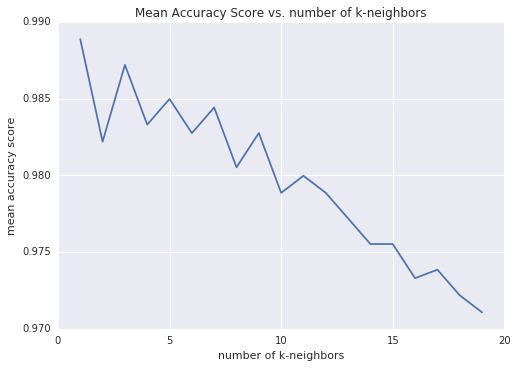

In [20]:
import seaborn as sns
plt.title("Mean Accuracy Score vs. number of k-neighbors")
plt.xlabel('number of k-neighbors')
plt.ylabel('mean accuracy score')
plt.plot(k_values,k_fold_mean_accuracy)

## 4. Neural Network with One Hidden Layer

There are a few downsides to using k-nearest neighbors:

<li>high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
<li>no model representation to debug and explore
Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

In [21]:
#Using 4-fold cross validation, Train and test a neural network model using a single hidden layer of 8,16,32,64,128,256 neurons.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def train_nn(train_features,train_labels,number_of_neurons):
    mlp=MLPClassifier(hidden_layer_sizes=number_of_neurons,max_iter=100)
    mlp.fit(train_features,train_labels)
    return mlp

#Write a function named test() that tests the model.
def test_nn(mlp,test_features,test_labels):
    nn_accuracies=[]
    predictions=mlp.predict(test_features)
    accuracy=accuracy_score(test_labels,predictions)
    nn_accuracies.append(accuracy)
    return nn_accuracies

#Write a function named cross_validate() that performs 4-fold cross validation using train() and test().
def cross_validate_nn(data,labels,number_of_neurons,number_of_folds):
    kf=KFold(n_splits=number_of_folds,shuffle=True,random_state=2)
    fold_accuracy=[]
    for train_index,test_index in kf.split(data):
        train_features,test_features=data.loc[train_index],data.loc[test_index]
        train_labels,test_labels=labels.loc[train_index],labels.loc[test_index]
        trained=train_nn(train_features,train_labels,number_of_neurons)
        tested=test_nn(trained,test_features,test_labels)
        fold_accuracy.append(tested)
    return fold_accuracy

In [22]:
#Experiment with different values for k and plot the resulting classification accuracies.
#neurons=[8,16,32,64,128,265]
neurons=[(8,),(16,),(32,),(64,)]
neural_network_mean_accuracy=[]
number_of_folds=4
for i in neurons:
    nn_accuracies=cross_validate_nn(data,labels,i,number_of_folds)
    nn_mean_accuracies=np.mean(nn_accuracies)
    neural_network_mean_accuracy.append(nn_mean_accuracies)
neural_network_mean_accuracy

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[0.772020539470428, 0.9248700816629547, 0.9488158871566443, 0.9549331848552338]

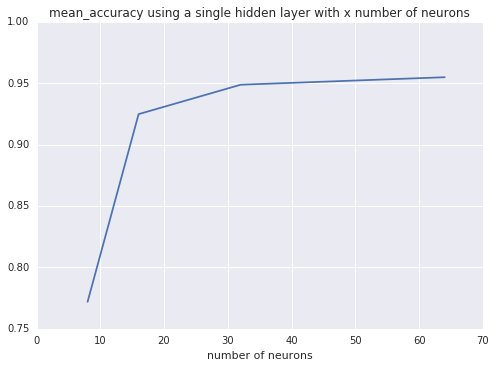

In [23]:
x=[i[0] for i in neurons]
plt.title('mean_accuracy using a single hidden layer with x number of neurons')
plt.xlabel('number of neurons')
plt.plot(x,neural_network_mean_accuracy)

Summary:
It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 81% to approximately 96%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## 5. Neural Network with Two Hidden Layers

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [24]:
neurons=[(8,),(16,),(32,),(64,64)]
neural_network_mean_accuracy=[]
number_of_folds=4
for i in neurons:
    nn_accuracies=cross_validate_nn(data,labels,i,number_of_folds)
    nn_mean_accuracies=np.mean(nn_accuracies)
    neural_network_mean_accuracy.append(nn_mean_accuracies)
neural_network_mean_accuracy

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[0.7756916604800792,
 0.9237886661717396,
 0.9526985894580549,
 0.9738530066815144]

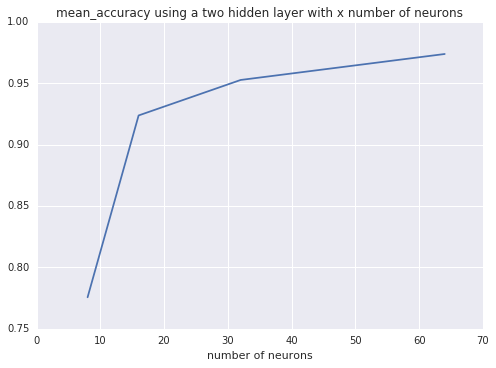

In [ ]:
x=[i[0] for i in neurons]
plt.title('mean_accuracy using a two hidden layer with x number of neurons')
plt.xlabel('number of neurons')
plt.plot(x,neural_network_mean_accuracy)

Summary
Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## 6. Neural Network with Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [ ]:
#Modify the neural network training pipeline to use 6 fold cross validation instead.
neurons=[(10,10,10),(64,64,64),(128,128,128)]
neural_network_mean_accuracy=[]
number_of_folds=6
for i in neurons:
    nn_accuracies=cross_validate_nn(data,labels,i,number_of_folds)
    nn_mean_accuracies=np.mean(nn_accuracies)
    neural_network_mean_accuracy.append(nn_mean_accuracies)
neural_network_mean_accuracy

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [ ]:
x=[i[0] for i in neurons]
plt.title('mean_accuracy using a three hidden layer with x number of neurons')
plt.xlabel('number of neurons')
plt.plot(x,neural_network_mean_accuracy)